target
1    526
0    499
Name: count, dtype: int64
Total percentage of missing data is 0.0%
Duplicate rows:
Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target, air quality, pollution factor, family history, temperature]
Index: []


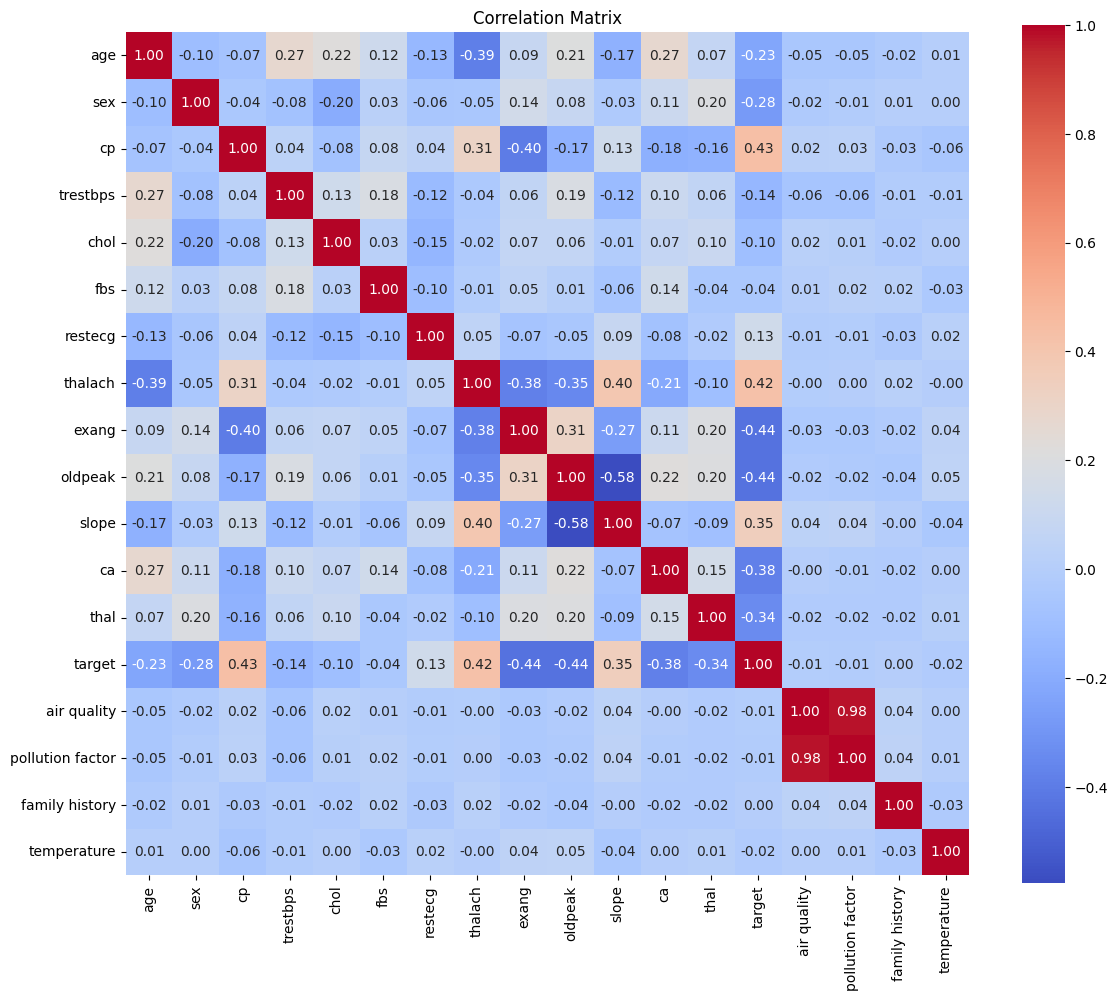


Selected Features: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'air quality', 'pollution factor', 'family history', 'temperature']
Done
[0.75, 0.68, 0.78, 0.8, 0.84, 0.87, 0.9, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97]
Xtrain-> 820 XTest-> 205 Ytrain-> 820 YTest-> 205
X_train-> 820 X_Test-> 205

 Cross-Validation Scores (5-fold):
Logistic Regression: Mean CV Accuracy = 0.8439
Decision Tree: Mean CV Accuracy = 0.8341
Random Forest: Mean CV Accuracy = 0.9824
Gradient Boosting: Mean CV Accuracy = 0.9522

 F1-Scores from Classification Report:
Logistic Regression: Weighted F1-score = 0.8087
Decision Tree: Weighted F1-score = 0.7978
Random Forest: Weighted F1-score = 0.9805
Gradient Boosting: Weighted F1-score = 0.9366

 Full Model Evaluation:

🔹 Model: Logistic Regression
✔ Training Accuracy: 0.8634
✔ Testing Accuracy: 0.8098
 Confusion Matrix:
[[75 27]
 [12 91]]
 Classification Report (in %):
  Class '

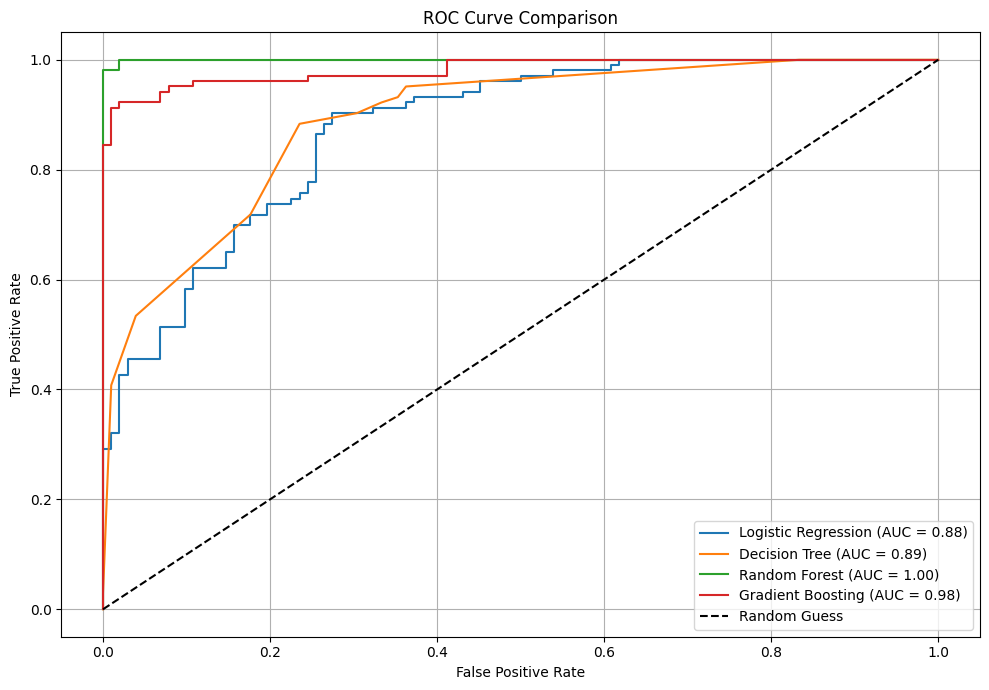

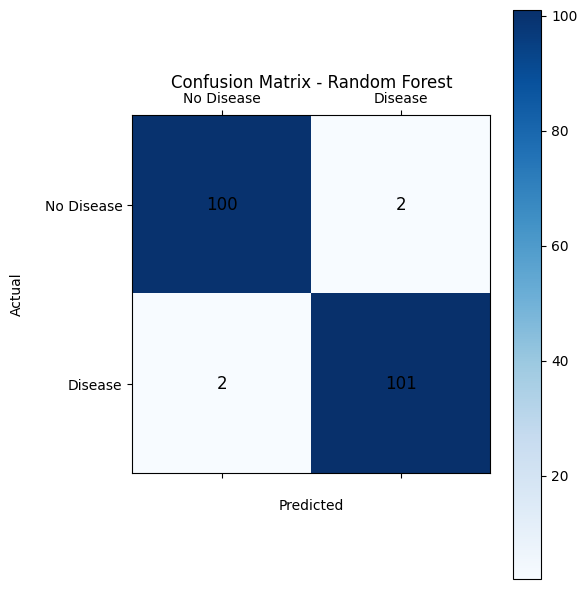


 Feature Importance for: Random Forest
cp                  0.136683
thal                0.128781
ca                  0.127725
oldpeak             0.110615
thalach             0.103702
age                 0.069226
chol                0.068115
trestbps            0.055700
slope               0.041764
exang               0.037494
air quality         0.031265
temperature         0.028115
sex                 0.028113
restecg             0.013235
pollution factor    0.009856
family history      0.005029
fbs                 0.004581
dtype: float64


C:\Users\manas\AppData\Local\Temp\ipykernel_8156\3000078370.py:285: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.values, y=importances.index, palette='viridis')


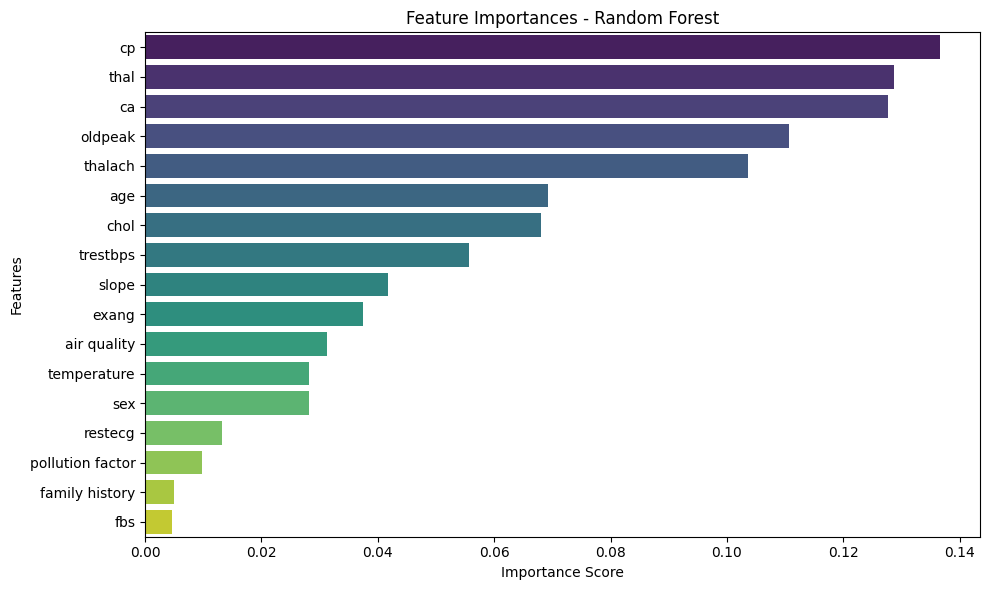

In [3]:
# -*- coding: utf-8 -*-
"""Untitled3.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1cWhrp1-z-38PJumAVc8UhEA2hadPMcAl
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import tkinter as tk
from tkinter import messagebox, scrolledtext

from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import tkinter as tk
from tkinter import ttk
from tkinter import Spinbox
from tkinter import messagebox, scrolledtext
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from tkinter import ttk

class ToolTip:
    def __init__(self, widget, text):
        self.widget = widget
        self.text = text
        self.tipwindow = None
        widget.bind("<Enter>", self.show_tip)
        widget.bind("<Leave>", self.hide_tip)
        widget.bind("<Button-1>", self.hide_tip)

    def show_tip(self, event=None):
        if self.tipwindow or not self.text:
            return
        x = self.widget.winfo_rootx() + 25
        y = self.widget.winfo_rooty() + 20
        self.tipwindow = tw = tk.Toplevel(self.widget)
        tw.wm_overrideredirect(True)
        tw.wm_geometry(f"+{x}+{y}")
        label = tk.Label(tw, text=self.text, background="#ffffe0", relief="solid", borderwidth=1, font=("Arial", 10))
        label.pack()

    def hide_tip(self, event=None):
        if self.tipwindow:
            self.tipwindow.destroy()
            self.tipwindow = None


# --- Read dataset ---

df = pd.read_csv(r"C:\Users\manas\Downloads\updated_github_dataset.csv")

print(df['target'].value_counts())
df.describe()

# --- Data Cleaning ---
missing_data= df.isnull().sum()
total_percentage = (missing_data.sum()/df.shape[0])*100
print(f'Total percentage of missing data is {round(total_percentage,2)}%')
df = df.fillna(df.mean(numeric_only=True))
duplicate=df[df.duplicated()]
print("Duplicate rows:")
print(duplicate)
df=df.drop_duplicates()

# --- Correlation Matrix ---
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()
# --- Feature Selection ---
X = df.drop("target", axis=1)
y = df["target"]

selector = SelectKBest(score_func=f_classif, k='all')
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("\nSelected Features:", selected_features.tolist())
# Unscaled features for tree models
X_raw = df[selected_features]
y = df["target"]
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_raw, y, test_size=0.2, random_state=42)
#score for decision tree
dt_scores = []
for i in range(1, len(X.columns) + 1):
    clf = DecisionTreeClassifier(max_depth= i, random_state=42)
    clf.fit(X_train_raw, y_train)
    dt_scores.append(round(clf.score(X_test_raw, y_test),2))
print("Done")
print(dt_scores)
#--Scale only for Logistic Regression ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_raw)
X_test_scaled = scaler.transform(X_test_raw)
print("Xtrain->", X_train_raw.shape[0], "XTest->", X_test_raw.shape[0],"Ytrain->", y_train.shape[0], "YTest->", y_test.shape[0])
print("X_train->", X_train_scaled.shape[0], "X_Test->", X_test_scaled.shape[0])
# --- Models ---
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(max_depth=4, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
}

results = {}
# ---Cross-Validation (Scale inside pipeline only for Logistic Regression) ---
cv_scores = {}
print("\n Cross-Validation Scores (5-fold):")
for name, model in models.items():
    if name == "Logistic Regression":
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('logreg', model)
        ])
        scores = cross_val_score(pipeline, X_raw, y, cv=5)
    else:
        scores = cross_val_score(model, X_raw, y, cv=5)

    mean_score = scores.mean()
    cv_scores[name] = mean_score
    print(f"{name}: Mean CV Accuracy = {mean_score:.4f}")
# ---F1-Score Evaluation ---
f1_scores = {}
print("\n F1-Scores from Classification Report:")
for name, model in models.items():
    if name == "Logistic Regression":
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('logreg', model)
        ])
        pipeline.fit(X_train_raw, y_train)
        y_pred = pipeline.predict(X_test_raw)
    else:
        model.fit(X_train_raw, y_train)
        y_pred = model.predict(X_test_raw)

    report = classification_report(y_test, y_pred, output_dict=True)
    f1 = report['weighted avg']['f1-score']
    f1_scores[name] = f1
    print(f"{name}: Weighted F1-score = {f1:.4f}")
# ---Full Model Evaluation ---
model_results = {}
print("\n Full Model Evaluation:\n")
for name, model in models.items():
    print(f"🔹 Model: {name}")
    if name == "Logistic Regression":
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('logreg', model)
        ])
        pipeline.fit(X_train_raw, y_train)
        y_train_pred = pipeline.predict(X_train_raw)
        y_test_pred = pipeline.predict(X_test_raw)
        y_prob = pipeline.predict_proba(X_test_raw)[:, 1]
    else:
        model.fit(X_train_raw, y_train)
        y_train_pred = model.predict(X_train_raw)
        y_test_pred = model.predict(X_test_raw)
        y_prob = model.predict_proba(X_test_raw)[:, 1] if hasattr(model, "predict_proba") else None

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    cm = confusion_matrix(y_test, y_test_pred)
    cr = classification_report(y_test, y_test_pred, output_dict=True)

    print(f"✔ Training Accuracy: {train_acc:.4f}")
    print(f"✔ Testing Accuracy: {test_acc:.4f}")
    print(" Confusion Matrix:")
    print(cm)
    print(" Classification Report (in %):")
    for label, metrics in cr.items():
        if isinstance(metrics, dict):
            print(f"  Class '{label}':")
            for metric_name, score in metrics.items():
                print(f"    {metric_name:9}: {score * 100:.2f}%")
        else:
            print(f"  {label:14}: {metrics * 100:.2f}%")

    # ROC & AUC
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
    else:
        fpr, tpr, roc_auc = None, None, None

    model_results[name] = {
        'train_acc': train_acc,
        'test_acc': test_acc,
        'classification_report': cr,
        'confusion_matrix': cm,
        'fpr': fpr,
        'tpr': tpr,
        'auc': roc_auc,
    }
    print("🔸" + "-"*50)
# ---Final Model Selection ---
combined_scores = {}
print("\n Final Combined Scores (60% CV + 40% F1):")
for name in models:
    combined = 0.6 * cv_scores[name] + 0.4 * f1_scores[name]
    combined_scores[name] = combined
    print(f"{name}: Combined Score = {combined:.4f}")

best_model_name = max(combined_scores, key=combined_scores.get)
best_model = models[best_model_name]
print(f"\n✅ Best Model Selected: {best_model_name} with Combined Score = {combined_scores[best_model_name]:.4f}")
# Plot ROC Curves
plt.figure(figsize=(10, 7))
for name, res in model_results.items():
    if res['fpr'] is not None:
        plt.plot(res['fpr'], res['tpr'], label=f"{name} (AUC = {res['auc']:.2f})")
    else:
        print(f" Skipping {name}: No ROC data")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()
# Predict using appropriate input
if best_model_name == "Logistic Regression":
    y_pred = best_model.predict(X_test_scaled)
else:
    y_pred = best_model.predict(X_test_raw)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
classes = ['No Disease', 'Disease']

# Plot
fig, ax = plt.subplots(figsize=(6, 6))
cax = ax.matshow(cm, cmap='Blues')
fig.colorbar(cax)

# Title & Axis Labels
plt.title(f'Confusion Matrix - {best_model_name}', pad=20)
ax.set_xlabel('Predicted', labelpad=15)
ax.set_ylabel('Actual', labelpad=15)

# Tick labels
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(classes, rotation=0)  # Horizontal labels
ax.set_yticklabels(classes)

# Annotate values inside matrix
for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, str(val), ha='center', va='center', color='black', fontsize=12)

plt.tight_layout()
plt.show()
# FEATURE IMPORTANCE
print(f"\n Feature Importance for: {best_model_name}")

if hasattr(best_model, "feature_importances_"):
    importances = pd.Series(best_model.feature_importances_, index=X.columns)
    importances = importances.sort_values(ascending=False)

    print(importances)

    # Plot feature importances
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances.values, y=importances.index, palette='viridis')
    plt.title(f'Feature Importances - {best_model_name}')
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()

elif best_model_name == "Logistic Regression" and hasattr(best_model, "coef_"):
    importances = pd.Series(best_model.coef_[0], index=X.columns)
    importances = importances.sort_values(key=abs, ascending=False)

    print(importances)

    # Plot feature coefficients
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances.values, y=importances.index, palette='coolwarm')
    plt.title(f'Feature Coefficients - Logistic Regression')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()
else:
    print(" Feature importance not available for this model.")

root = tk.Tk()
root.title("Heart Disease Risk Predictor")
entries = {}
fields = selected_features.tolist()  # Use selected features here

# Risk label and recommendation mapping function
def get_risk_info(prob):
    if prob <= 0.20:
        return ("No Risk", "gray",
            """✔ No Risk:
- Keep up your healthy habits:
- Balanced diet
- Regular exercise
- No smoking
- Stress management
- Annual check-ups still recommended.""")
    elif 0.20 < prob <= 0.40:
        return ("Low Risk", "green",
            """✔ Low Risk:
- Maintain a balanced and nutritious diet.
- Engage in regular physical activity.
- Avoid smoking and limit alcohol.
- Routine health check-ups.
- Manage stress proactively.""")
    elif 0.40 < prob <= 0.70:
        return ("Medium Risk", "orange",
            """⚠ Medium Risk:
- Schedule medical review.
- Moderate exercise routine.
- Improve dietary habits.
- Stop smoking, reduce alcohol.
- Monitor body weight.
- Practice stress relief activities.
- Regular healthcare follow-up.""")
    else:
        return ("High Risk", "red",
            """🛑 High Risk:
- Consult cardiologist promptly.
- Follow prescribed medications.
- Strict heart-healthy diet.
- Cease smoking and alcohol.
- Monitor symptoms closely.
- Physician-approved physical activity.
- Manage stress through counseling.""")

def predict():
    try:
        # Step 1: Define range checks
        valid_ranges = {
            "age": (1, 100),
            "trestbps": (94, 200),
            "chol": (126, 564),
            "thalach": (71, 202),
            "oldpeak": (0.0, 6.2),
            "air_quality": (0, 500),
            "temperature": (10.0, 50.0)
        }

        input_data = []
        for field in fields:
            entry = entries[field]

            if isinstance(entry, tuple):  # It's a dropdown
                var, _ = entry
                selected_val = var.get().strip()

                if selected_val not in {"0", "1", "2", "3"}:
                    raise ValueError(f"{field} invalid: not a valid drop-down option")

                val = int(selected_val)


            else:  # It's a text field
                val_str = entry.get().strip()
                if field in valid_ranges:
                    val = float(val_str)
                    min_val, max_val = valid_ranges[field]
                    if not (min_val <= val <= max_val):
                        raise ValueError(f"{field} out of range")
                else:
                    val = float(val_str)

            input_data.append(val)


        user_df = pd.DataFrame([input_data], columns=fields)

        # Step 3: Predict
        if best_model_name == "Logistic Regression":
            user_scaled = scaler.transform(user_df)
            prob = best_model.predict_proba(user_scaled)[0][1]
        else:
            prob = best_model.predict_proba(user_df)[0][1]

        # Step 4: Show result
        risk_label, color, recommendation = get_risk_info(prob)

        msg = (f"✔ Prediction: No immediate risk detected.\nProbability Score: {prob:.2f}"
               if risk_label == "No Risk"
               else f"⚠ Prediction: {risk_label} Detected.\nProbability Score: {prob:.2f}")

        proceed = messagebox.askyesno("Risk Prediction Result", msg)
        if not proceed:
            return

        for widget in graph_frame.winfo_children():
            widget.destroy()
        recommendation_box.delete('1.0', tk.END)

        fig = Figure(figsize=(6, 2.2), dpi=100)
        ax = fig.add_subplot(111)
        ax.barh(['Risk'], [prob], color=color)
        ax.set_xlim(0, 1)
        ax.set_xlabel("Probability")
        ax.set_title(f"Predicted Risk: {risk_label} ({prob:.2f})")

        canvas = FigureCanvasTkAgg(fig, master=graph_frame)
        canvas.draw()
        canvas.get_tk_widget().pack()

        recommendation_box.insert(tk.END, f"📖 Risk Level: {risk_label} ({prob:.2f})\n\n{recommendation}")

    except ValueError as ve:
        messagebox.showerror("ERROR", "Values entered are incorrect. Please CHECK.")


        # Risk graph
        fig = Figure(figsize=(6, 2.2), dpi=100)
        ax = fig.add_subplot(111)
        ax.barh(['Risk'], [prob], color=color)
        ax.set_xlim(0, 1)
        ax.set_xlabel("Probability")
        ax.set_title(f"Predicted Risk: {risk_label} ({prob:.2f})")

        canvas = FigureCanvasTkAgg(fig, master=graph_frame)
        canvas.draw()
        canvas.get_tk_widget().pack()

        # Show recommendation
        recommendation_box.insert(tk.END, f"📖 Risk Level: {risk_label} ({prob:.2f})\n\n{recommendation}")

    except Exception as e:
        messagebox.showerror("Error", f"Invalid input: {e}")

# Layout Frames
form_frame = tk.Frame(root)
form_frame.pack(padx=10, pady=10, side=tk.LEFT)
graph_frame = tk.Frame(root)
graph_frame.pack(padx=50, pady=50, side=tk.RIGHT)


# Input fields
# Placeholder text for selected input fields
dropdown_fields = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal", "pollution factor", "family history"]


# Define ranges for spinboxes with dummy placeholder text
spinbox_ranges = {
    "age": (1, 100, 1, "(1–100)"),
    "trestbps": (94, 200, 1, "(94-200)"),
    "chol": (126, 564, 1, " (126-564)"),
    "thalach": (71, 202, 1, " (71-202)"),
    "oldpeak": (0.0, 6.2, 0.1, " (0.0–6.2)"),
    "air quality": (0, 500, 1, "y (0–500)"),
    "temperature": (10.0, 50.0, 0.1, " (10.0–50.0)")
}

dropdown_options = {
    "sex": [("0 (female)", 0), ("1 (male)", 1)],
    "cp": [
        ("Class 0 (Typical angina)", 0),
        ("Class 1 (Atypical angina)", 1),
        ("Class 2 (Non-anginal pain)", 2),
        ("Class 3 (Asymptomatic)", 3)
    ],
    "fbs": [("0 (<= 120 mg/dL)", 0), ("1 (>= 120 mg/dL)", 1)],
    "exang": [("0 (no)", 0), ("1 (yes)", 1)],
    "restecg": [("0 (normal)", 0), ("1 (ST-T abnormality)", 1), ("2 (LVH)", 2)],
    "slope": [("0 (upsloping)", 0), ("1 (flat)", 1), ("2 (downsloping)", 2)],
    "ca": [("0 (none)", 0), ("1 (one vessel)", 1), ("2 (two vessels)", 2), ("3 (three vessels)", 3), ("4 (--)", 4)],
    "thal": [("0 (none)", 0), ("1 (fixed defect)", 1), ("2 (normal)", 2), ("3 (reversible defect)", 3)],
    "pollution factor": [("0", 0), ("1", 1), ("2", 2), ("3", 3), ("4", 4), ("5", 5)],
    "family history": [("0 (no)", 0), ("1 (yes)", 1)],
}


for i, field in enumerate(fields):
    tk.Label(form_frame, text=field.replace("_", " ").title(), font=("Arial", 12)).grid(row=i, column=0, sticky="w", pady=3)


    if field in dropdown_fields:
        var = tk.StringVar()
        options = dropdown_options.get(field, [])

        value_map = {label: value for label, value in options}
        reverse_map = {str(value): value for label, value in options}

        combo = ttk.Combobox(form_frame, textvariable=var, values=list(value_map.keys()), font=("Arial", 11), width=20)
        combo.grid(row=i, column=1, pady=3)
        combo.set('')  # Blank initially

        def on_select(event, var=var, combo=combo, value_map=value_map):
            selected_label = combo.get()
            int_val = value_map.get(selected_label, None)
            if int_val is not None:
                combo.set(str(int_val))  # show only the raw value

        combo.bind("<<ComboboxSelected>>", on_select)
        entries[field] = (var, value_map)


    elif field in spinbox_ranges:
        from_, to_, step, _ = spinbox_ranges[field]
        placeholder_text = f"{int(from_)}–{int(to_)}" if isinstance(from_, int) and isinstance(to_, int) else f"{from_}–{to_}"

        entry_var = tk.StringVar()
        entry = tk.Entry(form_frame, textvariable=entry_var, width=22, font=("Arial", 11), fg='black')

        def restrict_non_numeric(event):
            if event.char.isalpha():
                return "break"

        entry.bind("<Key>", restrict_non_numeric)
        ToolTip(entry, placeholder_text)

        entry.grid(row=i, column=1, pady=3)
        entries[field] = entry


tk.Button(form_frame, text="Predict Risk", command=predict, bg='lightblue').grid(row=len(fields), column=0, columnspan=2, pady=10)

recommendation_box = scrolledtext.ScrolledText(root, width=60, height=20, wrap=tk.WORD)
recommendation_box.pack(padx=10, pady=10)

root.mainloop()